## **Data Visualization: IMDb Top 250 Movies**

# **Import Libralies**



In [ ]:
!pip install XlsxWriter
from bs4 import BeautifulSoup
import requests  
import pandas as pd
import seaborn as sea
import re  
import xlsxwriter  
from random import randint 
from time import sleep   
import os
import matplotlib
import matplotlib.pyplot as plt
from google.colab import files

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Link & Requests**

In [ ]:
link = 'https://www.imdb.com/chart/top/?ref_=nv_mv_250'
url = requests.get(link)
url

<Response [200]>

# **List of Variables**

In [ ]:
name = []
year = []
vote = []
runtime = []
rating = []
all_genre = []
all_director = []
all_writer = []
all_star = []
all_country = []
all_language = []
all_production_company = []
budget = []
description = []

# **Web Scraping**

In [ ]:
soup = BeautifulSoup(url.content,'html.parser')
movies = soup.find('tbody',class_='lister-list').find_all('tr')
count = 1

for movie in movies:
    name.append(movie.find('td',class_='titleColumn').find('a').text)
    year.append(int(movie.find('td',class_='titleColumn').find('span').text.replace('(','').replace(')','')))
    vote.append(int(movie.find('td',class_='ratingColumn imdbRating').strong.get('title').split(' ')[3].replace(',','')))
    
    new_link = 'https://www.imdb.com/'+movie.find('td',class_='titleColumn').a.get('href')
    new_url = requests.get(new_link)
    new_soup = BeautifulSoup(new_url.content,'html.parser')
    
    try:
        time = new_soup.find(class_="sc-80d4314-2 iJtmbR").li.find_next_sibling().find_next_sibling().text
    except AttributeError:
        time = new_soup.find(class_="sc-80d4314-2 iJtmbR").li.find_next_sibling().text
        
    time = [int(i) for i in re.findall('\d',time)]
    time[0] = time[0]*60 if time[0]>=1 else time[0]
    temp_str = ""
    for i in range(1,len(time)):
        temp_str = temp_str+str(time[i])
        
    try:
        runtime.append(time[0]+int(temp_str))
    except ValueError:
        runtime.append(time[0])
    
    movie_details = new_soup.find('div',class_="sc-2a827f80-10 fVYbpg")
    
    try:
      description.append(movie_details.find('p',class_="sc-16ede01-6 cXGXRR").span.text)
    except AttributeError:
      description.append(movie_details.find('div',class_="sc-16ede01-7 hrgVKw").span.text)

    rating.append(float(movie_details.find('div',class_="sc-7ab21ed2-2 kYEdvH").span.text))
      
    genre = movie_details.find('div',class_="ipc-chip-list__scroller").find_all('a')
    temp_genre = []
    for i in genre:
        temp_genre.append(i.text)
    all_genre.append(','.join(temp_genre))
    
    director = movie_details.ul.li.div.find_all('li')
    temp_director = []
    for i in director:
        temp_director.append(i.a.text)
    all_director.append(','.join(temp_director))

    writer = movie_details.ul.li.find_next_sibling().div.find_all('li')
    temp_writer = []
    for i in writer:
        temp_writer.append(i.a.text)
    all_writer.append(','.join(temp_writer))
    
    star = movie_details.ul.li.find_next_sibling().find_next_sibling().div.ul.find_all('li')
    temp_star = []
    for i in star:
        temp_star.append(i.a.text)
    all_star.append(','.join(temp_star))
    
    country = new_soup.find('li', attrs={'data-testid': 'title-details-origin'}).ul.find_all('li')
    temp_country = []
    for i in country:
        temp_country.append(i.text)
    all_country.append(','.join(temp_country))
    
    languages = new_soup.find('li', attrs={'data-testid': 'title-details-languages'}).ul.find_all('li')
    temp_languages = []
    for i in languages:
        temp_languages.append(i.text)
    all_language.append(','.join(temp_languages))
    
    production_company = new_soup.find('li', attrs={'data-testid': 'title-details-companies'}).ul.find_all('li')
    temp_production = []
    for i in production_company:
        temp_production.append(i.text)
    all_production_company.append(','.join(temp_production))
    
    try:
        temp_budget = re.findall('\d',new_soup.find('li', attrs={'data-testid': 'title-boxoffice-budget'}).ul.li.span.text)
        budget.append(int(''.join(temp_budget)))
    except AttributeError:
        budget.append(None)
    
    print("Round :",count)
    count+=1
    delay = randint(1,5)
    sleep(delay)

# **Create DataFrame**

In [ ]:
list_All = list(zip(name,year,runtime,rating,vote,all_genre,budget,all_director,all_star,
                    all_writer,all_country,all_language,all_production_company,description))
column_Name = ['Name','Year','Runtime','Rating','Votes','Genre','BudgetUSD','Director',
               'Star','Writer','Country','Languages','ProductionCompany','Description']
df = pd.DataFrame(list_All,columns=column_Name)

# **Exporting a Pandas DataFrame to an Excel file**

In [ ]:
save_file = pd.ExcelWriter('Dataset.xlsx', engine='xlsxwriter')
df.to_excel(save_file, sheet_name='Sheet1')
save_file.save()

# **Import Excel file**

In [ ]:
##file_ID = '1HPknG0Kf-yY7bypGyBHZI9OD5OXWAimJ'
!gdown --id 1HPknG0Kf-yY7bypGyBHZI9OD5OXWAimJ

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1HPknG0Kf-yY7bypGyBHZI9OD5OXWAimJ
To: /content/DatasetIMDB.xlsx
100% 64.9k/64.9k [00:00<00:00, 61.1MB/s]


In [ ]:
df = pd.read_excel('DatasetIMDB.xlsx', index_col=[0])
df.head()

,Name,Year,Runtime,Rating,Votes,Genre,BudgetUSD,Director,Star,Writer,Country,Languages,ProductionCompany,Description
0.0,The Shawshank Redemption,1994.0,142.0,9.3,2640745.0,Drama,25000000.0,Frank Darabont,"Tim Robbins,Morgan Freeman,Bob Gunton","Stephen King,Frank Darabont",United States,English,Castle Rock Entertainment,Two imprisoned men bond over a number of years...
1.0,The Godfather,1972.0,175.0,9.2,1830504.0,"Crime,Drama",6000000.0,Francis Ford Coppola,"Marlon Brando,Al Pacino,James Caan","Mario Puzo,Francis Ford Coppola",United States,"English,Italian,Latin","Paramount Pictures,Albert S. Ruddy Productions...",The aging patriarch of an organized crime dyna...
2.0,The Dark Knight,2008.0,152.0,9.0,2612396.0,"Action,Crime,Drama",185000000.0,Christopher Nolan,"Christian Bale,Heath Ledger,Aaron Eckhart","Jonathan Nolan,Christopher Nolan,David S. Goyer","United States,United Kingdom","English,Mandarin","Warner Bros.,Legendary Entertainment,Syncopy",When the menace known as the Joker wreaks havo...
3.0,The Godfather Part II,1974.0,202.0,9.0,1254908.0,"Crime,Drama",13000000.0,Francis Ford Coppola,"Al Pacino,Robert De Niro,Robert Duvall","Francis Ford Coppola,Mario Puzo",United States,"English,Italian,Spanish,Latin,Sicilian","Paramount Pictures,The Coppola Company,America...",The early life and career of Vito Corleone in ...
4.0,12 Angry Men,1957.0,96.0,9.0,779636.0,"Crime,Drama",350000.0,Sidney Lumet,"Henry Fonda,Lee J. Cobb,Martin Balsam",Reginald Rose,United States,English,Orion-Nova Productions,The jury in a New York City murder trial is fr...


# **Coding**

In [ ]:
#แยกปีของแต่ละเรื่องเป็นทศวรรษ
df['Decade'] = ((df['Year']//10).astype(int)*10) 

In [ ]:
#แยกเวลาของหนังแต่ละเรื่องเป็นช่วงนาที
df['Runtime'] = ((df['Runtime']//10).astype(int)*10) 

In [ ]:
#เช็คว่าข้อมูลไหนที่ไม่ทราบค่าบ้าง
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 250 entries, 0.0 to 249.0
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               250 non-null    object 
 1   Year               250 non-null    float64
 2   Runtime            250 non-null    int64  
 3   Rating             250 non-null    float64
 4   Votes              250 non-null    float64
 5   Genre              250 non-null    object 
 6   BudgetUSD          240 non-null    float64
 7   Director           250 non-null    object 
 8   Star               250 non-null    object 
 9   Writer             250 non-null    object 
 10  Country            250 non-null    object 
 11  Languages          250 non-null    object 
 12  ProductionCompany  250 non-null    object 
 13  Description        250 non-null    object 
 14  Decade             250 non-null    int64  
dtypes: float64(4), int64(2), object(9)
memory usage: 31.2+ KB


In [ ]:
#หนังที่ไม่ทราบค่า Budget
null_budget = df[df['BudgetUSD'].isnull()]
null_budget

,Name,Year,Runtime,Rating,Votes,Genre,BudgetUSD,Director,Star,Writer,Country,Languages,ProductionCompany,Description,Decade
45.0,Seppuku,1962.0,130,8.6,56193.0,"Action,Drama,Mystery",NaN,Masaki Kobayashi,"Tatsuya Nakadai,Akira Ishihama,Shima Iwashita","Yasuhiko Takiguchi,Shinobu Hashimoto",Japan,Japanese,Shochiku,When a ronin requesting seppuku at a feudal lo...,1960
96.0,M - Eine Stadt sucht einen Mörder,1931.0,110,8.3,157326.0,"Crime,Mystery,Thriller",NaN,Fritz Lang,"Peter Lorre,Ellen Widmann,Inge Landgut","Thea von Harbou,Fritz Lang,Egon Jacobsohn",Germany,German,Nero-Film AG,When the police in a German city are unable to...,1930
105.0,Ikiru,1952.0,140,8.3,78134.0,Drama,NaN,Akira Kurosawa,"Takashi Shimura,Nobuo Kaneko,Shin'ichi Himori","Akira Kurosawa,Shinobu Hashimoto,Hideo Oguni",Japan,Japanese,Toho Company,A bureaucrat tries to find meaning in his life...,1950
178.0,The Third Man,1949.0,100,8.1,171297.0,"Film-Noir,Mystery,Thriller",NaN,Carol Reed,"Orson Welles,Joseph Cotten,Alida Valli","Graham Greene,Orson Welles,Alexander Korda",United Kingdom,"English,German,Russian,French",London Film Productions,Pulp novelist Holly Martins travels to shadowy...,1940
182.0,Smultronstället,1957.0,90,8.1,107142.0,"Drama,Romance",NaN,Ingmar Bergman,"Victor Sjöström,Bibi Andersson,Ingrid Thulin",Ingmar Bergman,Sweden,"Swedish,Latin",Svensk Filmindustri (SF),"After living a life marked by coldness, an agi...",1950
193.0,Sherlock Jr.,1924.0,240,8.2,49833.0,"Action,Comedy,Romance",NaN,Buster Keaton,"Buster Keaton,Kathryn McGuire,Joe Keaton","Jean C. Havez,Joseph A. Mitchell,Clyde Bruckman",United States,"English,None",Buster Keaton Productions,"A film projectionist longs to be a detective, ...",1920
206.0,Tôkyô monogatari,1953.0,130,8.2,61568.0,Drama,NaN,Yasujirô Ozu,"Chishû Ryû,Chieko Higashiyama,Sô Yamamura","Kôgo Noda,Yasujirô Ozu",Japan,"Japanese,English","Shochiku,Entertain Me Productions",An old couple visit their children and grandch...,1950
208.0,La passion de Jeanne d'Arc,1928.0,110,8.2,54680.0,"Biography,Drama,History",NaN,Carl Theodor Dreyer,"Maria Falconetti,Eugene Silvain,André Berley","Joseph Delteil,Carl Theodor Dreyer",France,"None,French",Société générale des films,"In 1431, Jeanne d'Arc is placed on trial on ch...",1920
239.0,Les quatre cents coups,1959.0,90,8.1,117480.0,"Crime,Drama",NaN,François Truffaut,"Jean-Pierre Léaud,Albert Rémy,Claire Maurier","François Truffaut,Marcel Moussy",France,"French,English","Les Films du Carrosse,Sédif Productions","A young boy, left without attention, delves in...",1950
240.0,Persona,1966.0,80,8.1,118099.0,"Drama,Thriller",NaN,Ingmar Bergman,"Bibi Andersson,Liv Ullmann,Margaretha Krook",Ingmar Bergman,Sweden,"Swedish,English",AB Svensk Filmindustri,A nurse is put in charge of a mute actress and...,1960


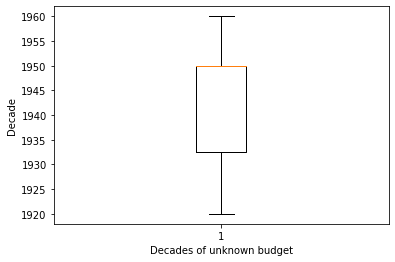

In [ ]:
plt.boxplot(null_budget['Decade'])
plt.xlabel('Decades of unknown budget')
plt.ylabel('Decade')
plt.show()

In [ ]:
#จำนวนภาพยนตร์ที่ออก,ค่าเฉลี่ยเรตติ้ง,ค่าเฉลี่ยจำนวนคนโหวต,ค่าเฉลี่ยงบประมาณสร้างภาพยนตร์ ในแต่ละทศวรรษ
moviesByDecade = pd.DataFrame({
	'Decade' : df['Decade'].value_counts().index,
	'Movies' : df['Decade'].value_counts(),
	'Average IMDB Rating' : None,
	'Average IMDB Voter' : None,
	'Average IMDB BudgetUSD' : None
}).sort_values('Decade').reset_index(drop = True)

moviesByDecade

,Decade,Movies,Average IMDB Rating,Average IMDB Voter,Average IMDB BudgetUSD
0,1920,6,None,None,None
1,1930,7,None,None,None
2,1940,12,None,None,None
3,1950,23,None,None,None
4,1960,18,None,None,None
5,1970,19,None,None,None
6,1980,27,None,None,None
7,1990,41,None,None,None
8,2000,48,None,None,None
9,2010,43,None,None,None


In [ ]:
#จำนวนภาพยนตร์ที่ออก,ค่าเฉลี่ยเรตติ้ง,ค่าเฉลี่ยจำนวนคนโหวต,ค่าเฉลี่ยงบประมาณสร้างภาพยนตร์ ในแต่ละช่วงความยาวของภาพยนตร์
moviesByRuntime = pd.DataFrame({
	'Runtime' : df['Runtime'].value_counts().index,
	'Movies' : df['Runtime'].value_counts(),
	'Average IMDB Rating' : None,
	'Average IMDB Voter' : None,
	'Average IMDB BudgetUSD' : None
}).sort_values('Runtime').reset_index(drop = True)

moviesByRuntime

,Runtime,Movies,Average IMDB Rating,Average IMDB Voter,Average IMDB BudgetUSD
0,60,2,None,None,None
1,80,14,None,None,None
2,90,24,None,None,None
3,100,25,None,None,None
4,110,32,None,None,None
5,120,40,None,None,None
6,130,38,None,None,None
7,140,22,None,None,None
8,150,13,None,None,None
9,160,13,None,None,None


In [ ]:
#Calculate Average IMDB Ratings by Decade
for i in range(len(moviesByDecade)):
	decadeFilter = df['Decade'] == moviesByDecade.iloc[i, 0]
	filteredMovies = df[decadeFilter]
	moviesByDecade.iloc[i, 2] = filteredMovies['Rating'].mean()

moviesByDecade

,Decade,Movies,Average IMDB Rating,Average IMDB Voter,Average IMDB BudgetUSD
0,1920,6,8.233333,None,None
1,1930,7,8.257143,None,None
2,1940,12,8.266667,None,None
3,1950,23,8.291304,None,None
4,1960,18,8.316667,None,None
5,1970,19,8.342105,None,None
6,1980,27,8.285185,None,None
7,1990,41,8.404878,None,None
8,2000,48,8.304167,None,None
9,2010,43,8.255814,None,None


In [ ]:
#Calculate Average IMDB Voter by Decade
for i in range(len(moviesByDecade)):
  decadeFilter = df['Decade'] == moviesByDecade.iloc[i, 0]
  filteredMovies = df[decadeFilter]
  moviesByDecade.iloc[i, 3] = filteredMovies['Votes'].mean()
  
moviesByDecade

,Decade,Movies,Average IMDB Rating,Average IMDB Voter,Average IMDB BudgetUSD
0,1920,6,8.233333,101111.166667,None
1,1930,7,8.257143,216069.857143,None
2,1940,12,8.266667,219043.75,None
3,1950,23,8.291304,222415.478261,None
4,1960,18,8.316667,281727.944444,None
5,1970,19,8.342105,652171.052632,None
6,1980,27,8.285185,577227.037037,None
7,1990,41,8.404878,984954.609756,None
8,2000,48,8.304167,853640.083333,None
9,2010,43,8.255814,730004.627907,None


In [ ]:
#Calculate Average IMDB Budget USD by Decade
for i in range(len(moviesByDecade)):
  decadeFilter = df['Decade'] == moviesByDecade.iloc[i, 0]
  filteredMovies = df[decadeFilter]
  moviesByDecade.iloc[i, 4] = filteredMovies['BudgetUSD'].mean()
  
moviesByDecade

,Decade,Movies,Average IMDB Rating,Average IMDB Voter,Average IMDB BudgetUSD
0,1920,6,8.233333,101111.166667,1980750.0
1,1930,7,8.257143,216069.857143,1996500.0
2,1940,12,8.266667,219043.75,1492544.454545
3,1950,23,8.291304,222415.478261,12899695.421053
4,1960,18,8.316667,281727.944444,3927457.4375
5,1970,19,8.342105,652171.052632,7762609.210526
6,1980,27,8.285185,577227.037037,18803703.703704
7,1990,41,8.404878,984954.609756,33546294.634146
8,2000,48,8.304167,853640.083333,50336061.145833
9,2010,43,8.255814,730004.627907,79261206.930233


In [ ]:
#Calculate Average IMDB Ratings by Runtime
for i in range(len(moviesByRuntime)):
	runtimeFilter = df['Runtime'] == moviesByRuntime.iloc[i, 0]
	filteredMovies = df[runtimeFilter]
	moviesByRuntime.iloc[i, 2] = filteredMovies['Rating'].mean()

moviesByRuntime

,Runtime,Movies,Average IMDB Rating,Average IMDB Voter,Average IMDB BudgetUSD
0,60,2,8.25,None,None
1,80,14,8.278571,None,None
2,90,24,8.191667,None,None
3,100,25,8.26,None,None
4,110,32,8.3,None,None
5,120,40,8.25,None,None
6,130,38,8.307895,None,None
7,140,22,8.372727,None,None
8,150,13,8.4,None,None
9,160,13,8.453846,None,None


In [ ]:
#Calculate Average IMDB Voter by Runtime
for i in range(len(moviesByRuntime)):
  runtimeFilter = df['Runtime'] == moviesByRuntime.iloc[i, 0]
  filteredMovies = df[runtimeFilter]
  moviesByRuntime.iloc[i, 3] = filteredMovies['Votes'].mean()
  
moviesByRuntime

,Runtime,Movies,Average IMDB Rating,Average IMDB Voter,Average IMDB BudgetUSD
0,60,2,8.25,108687.5,None
1,80,14,8.278571,331253.357143,None
2,90,24,8.191667,488844.541667,None
3,100,25,8.26,586829.08,None
4,110,32,8.3,655130.5625,None
5,120,40,8.25,521063.35,None
6,130,38,8.307895,640191.526316,None
7,140,22,8.372727,860309.772727,None
8,150,13,8.4,950620.461538,None
9,160,13,8.453846,681902.769231,None


In [ ]:
#Calculate Average IMDB Budget USD by Runtime
for i in range(len(moviesByRuntime)):
  runtimeFilter = df['Runtime'] == moviesByRuntime.iloc[i, 0]
  filteredMovies = df[runtimeFilter]
  moviesByRuntime.iloc[i, 4] = filteredMovies['BudgetUSD'].mean()
  
moviesByRuntime

,Runtime,Movies,Average IMDB Rating,Average IMDB Voter,Average IMDB BudgetUSD
0,60,2,8.25,108687.5,500000.0
1,80,14,8.278571,331253.357143,12892153.846154
2,90,24,8.191667,488844.541667,43371935.227273
3,100,25,8.26,586829.08,27559826.583333
4,110,32,8.3,655130.5625,29674131.066667
5,120,40,8.25,521063.35,16025616.8
6,130,38,8.307895,640191.526316,38861661.694444
7,140,22,8.372727,860309.772727,65813388.857143
8,150,13,8.4,950620.461538,52776923.076923
9,160,13,8.453846,681902.769231,49747757.384615


In [ ]:
# Set of unique genres
genreList = set()

# List of genre for each movie
genres = []

for i in range(len(df)):
  genres.append(df.iloc[i,5])
  genreList.update(set((df.iloc[i,5]).split(',')))

# Change Genre Column to list from string
df['Genre'] = pd.Series(genres)

# Number of movies segregated by Genre
moviesByGenre = pd.DataFrame({
	'Genres' : list(genreList),
	'Movies' : 0
})

# Add number of movies for each genre
for i in range(len(moviesByGenre)):
	for j in range(len(df)):
		if moviesByGenre.iloc[i, 0] in df.iloc[j, 5]:
			moviesByGenre.iloc[i, 1]+=1

In [ ]:
moviesByGenre = moviesByGenre.sort_values('Movies')
moviesByGenre

,Genres,Movies
14,Musical,1
18,Film-Noir,4
3,Music,5
13,Horror,5
19,Sport,5
0,Western,6
15,History,9
17,Family,12
5,Fantasy,14
7,Sci-Fi,20


In [ ]:
# Set of unique director
directorList = set()
# List of director for each movie
directors = []

for i in range(len(df)):
  directors.append(df.iloc[i,7])
  directorList.update(set((df.iloc[i,7]).split(',')))

# Change Director Column to list from string
df['Director'] = pd.Series(directors)

# Number of movies segregated by Director
moviesByDirector = pd.DataFrame({
	'Directors' : list(directorList),
	'Movies' : 0
})

# Add number of movies for each director
for i in range(len(moviesByDirector)):
	for j in range(len(df)):
		if moviesByDirector.iloc[i, 0] in df.iloc[j, 7]:
			moviesByDirector.iloc[i, 1]+=1

In [ ]:
moviesByDirector

,Directors,Movies
0,Akira Kurosawa,7
1,Elem Klimov,1
2,Terry Jones,2
3,Olivier Nakache,1
4,Bryan Singer,1
...,...,...
170,Christopher Nolan,7
171,George Roy Hill,1
172,Alfred Hitchcock,6
173,Jon Watts,1


In [ ]:
md_nona = moviesByDirector.dropna()
mdTop = md_nona[md_nona['Movies']>=4]
mdTop = mdTop.sort_values('Movies')
mdTop

,Directors,Movies
55,Lee Unkrich,4
92,Sergio Leone,4
144,Hayao Miyazaki,4
67,Charles Chaplin,5
81,Quentin Tarantino,5
155,Billy Wilder,5
172,Alfred Hitchcock,6
0,Akira Kurosawa,7
17,Martin Scorsese,7
77,Steven Spielberg,7


In [ ]:
# Set of unique stars
starList = set()

# List of stars for each movie
stars = []

for i in range(len(df)):
  stars.append(df.iloc[i,8])
  starList.update(set((df.iloc[i,8]).split(',')))

# Change stars Column to list from string
df['Star'] = pd.Series(stars)

# Number of movies segregated by stars
moviesByStar = pd.DataFrame({
	'Stars' : list(starList),
	'Movies' : 0
})

# Add number of movies for each stars
for i in range(len(moviesByStar)):
	for j in range(len(df)):
		if moviesByStar.iloc[i, 0] in df.iloc[j, 8]:
			moviesByStar.iloc[i, 1]+=1

In [ ]:
moviesByStar

,Stars,Movies
0,Joaquin Phoenix,3
1,Hitoshi Takagi,1
2,Mary Gibbs,1
3,Daryl Hannah,1
4,Anne Hathaway,2
...,...,...
583,Alida Valli,1
584,Viggo Mortensen,3
585,Dorothy Comingore,1
586,Keir Dullea,1


In [ ]:
ms_nona = moviesByStar.dropna()
msTop = ms_nona[ms_nona['Movies']>=4]
msTop = msTop.sort_values('Movies')
msTop

,Stars,Movies
10,James Stewart,4
357,Jack Nicholson,4
318,Matt Damon,4
247,Kevin Spacey,4
457,Al Pacino,4
211,Toshirô Mifune,4
220,Morgan Freeman,4
175,Mark Ruffalo,4
132,Tatsuya Nakadai,4
30,Brad Pitt,4


In [ ]:
# Set of unique writers
writerList = set()

# List of writers for each movie
writers = []

for i in range(len(df)):
  writers.append(df.iloc[i,9])
  writerList.update(set((df.iloc[i,9]).split(',')))

# Change writers Column to list from string
df['Writer'] = pd.Series(writers)

# Number of movies segregated by writers
moviesByWriter = pd.DataFrame({
	'Writers' : list(writerList),
	'Movies' : 0
})

# Add number of movies for each writers
for i in range(len(moviesByWriter)):
	for j in range(len(df)):
		if moviesByWriter.iloc[i, 0] in df.iloc[j, 9]:
			moviesByWriter.iloc[i, 1]+=1

In [ ]:
moviesByWriter

,Writers,Movies
0,Guillermo Arriaga,1
1,Jean C. Havez,1
2,Cormac McCarthy,1
3,David Franzoni,1
4,Eijirô Hisaita,1
...,...,...
432,Christopher Priest,1
433,Walter Hill,1
434,Tom Schulman,1
435,I.A.L. Diamond,2


In [ ]:
mw_nona = moviesByWriter.dropna()
mwTop = mw_nona[mw_nona['Movies']>=4]
mwTop = mwTop.sort_values('Movies')
mwTop

,Writers,Movies
28,Shinobu Hashimoto,4
201,Hayao Miyazaki,4
232,Stephen King,4
297,Hideo Oguni,4
324,Andrew Stanton,4
113,Quentin Tarantino,5
152,Jonathan Nolan,5
309,Charles Chaplin,5
332,Pete Docter,5
402,George Lucas,5


In [ ]:
# Set of unique countrys
countryList = set()

# List of countrys for each movie
countrys = []

for i in range(len(df)):
  countrys.append(df.iloc[i,10])
  countryList.update(set((df.iloc[i,10]).split(',')))

# Change countrys Column to list from string
df['Country'] = pd.Series(countrys)

# Number of movies segregated by countrys
moviesByCountry = pd.DataFrame({
	'Countrys' : list(countryList),
	'Movies' : 0
})

# Add number of movies for each countrys
for i in range(len(moviesByCountry)):
	for j in range(len(df)):
		if moviesByCountry.iloc[i, 0] in df.iloc[j,10]:
			moviesByCountry.iloc[i, 1]+=1

In [ ]:
moviesByCountry = moviesByCountry.sort_values('Movies')
moviesByCountry

,Countrys,Movies
16,Lebanon,1
29,China,1
27,Poland,1
26,Cyprus,1
24,Malta,1
22,Denmark,1
19,Hong Kong,1
18,Qatar,1
9,Turkey,1
32,Algeria,1


In [ ]:
# Set of unique languages
languageList = set()

# List of languages for each movie
languages = []

for i in range(len(df)):
  languages.append(df.iloc[i,11])
  languageList.update(set((df.iloc[i,11]).split(',')))

# Change languages Column to list from string
df['Languages'] = pd.Series(languages)

# Number of movies segregated by languages
moviesByLanguage = pd.DataFrame({
	'Languages' : list(languageList),
	'Movies' : 0
})

# Add number of movies for each languages
for i in range(len(moviesByLanguage)):
	for j in range(len(df)):
		if moviesByLanguage.iloc[i, 0] in df.iloc[j,11]:
			moviesByLanguage.iloc[i, 1]+=1

In [ ]:
moviesByLanguage = moviesByLanguage.sort_values('Movies')
moviesByLanguage

,Languages,Movies
24,Sicilian,1
41,Kinyarwanda,1
39,Tamil,1
37,Swahili,1
35,American Sign Language,1
27,Zulu,1
48,Hmong,1
20,Irish Gaelic,1
19,Quenya,1
15,Bengali,1


In [ ]:
# Set of unique production company
pcList = set()

# List of production company for each movie
pc = []

for i in range(len(df)):
  pc.append(df.iloc[i,12])
  pcList.update(set((df.iloc[i,12]).split(',')))

# Change production company Column to list from string
df['ProductionCompany'] = pd.Series(pc)

# Number of movies segregated by production company
moviesByProductionCompany = pd.DataFrame({
	'ProductionCompany' : list(pcList),
	'Movies' : 0
})

# Add number of movies for each production company
for i in range(len(moviesByProductionCompany)):
	for j in range(len(df)):
		if moviesByProductionCompany.iloc[i, 0] in df.iloc[j,12]:
			moviesByProductionCompany.iloc[i, 1]+=1

In [ ]:
moviesByProductionCompany

,ProductionCompany,Movies
0,International Film Investors,1
1,Newmarket Capital Group,1
2,Produzioni De Sica,1
3,Norddeutscher Rundfunk (NDR),1
4,Tequila Gang,1
...,...,...
348,Alfran Productions,1
349,Vinod Chopra Productions,1
350,AB Svensk Filmindustri,1
351,Government of West Bengal,1


In [ ]:
mpc_nona = moviesByProductionCompany.dropna()
mpcTop = mpc_nona[mpc_nona['Movies']>=4]
mpcTop = mpcTop.sort_values('Movies')
mpcTop

,ProductionCompany,Movies
181,Legendary Entertainment,4
49,The Saul Zaentz Company,4
78,Amblin Entertainment,4
298,Toho Company,4
331,Castle Rock Entertainment,4
329,New Line Cinema,5
324,Miramax,5
120,Charles Chaplin Productions,5
153,New Regency Productions,5
253,Lucasfilm,5


In [ ]:
#ภาพยนตร์ 3 อันดับแรกที่ใช้งบประมาณสร้างมากที่สุด
df.sort_values('BudgetUSD',ascending=False).head(3)

,Name,Year,Runtime,Rating,Votes,Genre,BudgetUSD,Director,Star,Writer,Country,Languages,ProductionCompany,Description,Decade
79.0,Avengers: Endgame,2019.0,180,8.4,1100645.0,"Action,Adventure,Drama",356000000.0,"Anthony Russo,Joe Russo","Robert Downey Jr.,Chris Evans,Mark Ruffalo","Christopher Markus,Stephen McFeely,Stan Lee",United States,"English,Japanese,Xhosa,German","Marvel Studios,Walt Disney Pictures",After the devastating events of Avengers: Infi...,2010
62.0,Avengers: Infinity War,2018.0,140,8.4,1055310.0,"Action,Adventure,Sci-Fi",321000000.0,"Anthony Russo,Joe Russo","Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo","Christopher Markus,Stephen McFeely,Stan Lee",United States,English,"Marvel Studios,Jason Roberts Productions,South...",The Avengers and their allies must be willing ...,2010
69.0,The Dark Knight Rises,2012.0,160,8.4,1683240.0,"Action,Drama",250000000.0,Christopher Nolan,"Christian Bale,Tom Hardy,Anne Hathaway","Jonathan Nolan,Christopher Nolan,David S. Goyer","United States,United Kingdom","English,Arabic","Warner Bros.,Legendary Entertainment,DC Entert...",Eight years after the Joker's reign of anarchy...,2010


In [ ]:
#ภาพยนตร์ที่ใช้งบประมาณสร้างน้อยที่สุด
df.sort_values('BudgetUSD').head(3)

,Name,Year,Runtime,Rating,Votes,Genre,BudgetUSD,Director,Star,Writer,Country,Languages,ProductionCompany,Description,Decade
213.0,Pather Panchali,1955.0,120,8.3,32801.0,Drama,1824.0,Satyajit Ray,"Kanu Bannerjee,Karuna Bannerjee,Subir Banerjee","Bibhutibhushan Bandyopadhyay,Satyajit Ray",India,Bengali,Government of West Bengal,"Impoverished priest Harihar Ray, dreaming of a...",1950
120.0,Ladri di biciclette,1948.0,80,8.3,162909.0,Drama,133000.0,Vittorio De Sica,"Lamberto Maggiorani,Enzo Staiola,Lianella Carell","Cesare Zavattini,Luigi Bartolini,Oreste Biancoli",Italy,"Italian,English,German",Produzioni De Sica,"In post-war Italy, a working-class man's bicyc...",1940
197.0,Det sjunde inseglet,1957.0,90,8.1,184438.0,"Drama,Fantasy",150000.0,Ingmar Bergman,"Max von Sydow,Gunnar Björnstrand,Bengt Ekerot",Ingmar Bergman,Sweden,"Swedish,Latin",Svensk Filmindustri (SF),A knight returning to Sweden after the Crusade...,1950


# **Plot Graph**

In [ ]:
#set theme graph
sea.set_theme()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

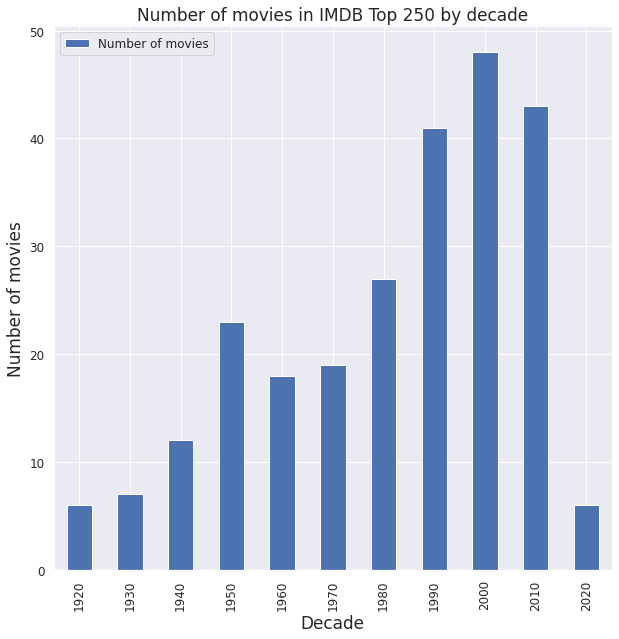

In [ ]:
# Plot movies by decade
moviesByDecade.plot(x = 'Decade', y = 'Movies', kind = 'bar', figsize=(10, 10),fontsize = 12)
plt.title('Number of movies in IMDB Top 250 by decade', fontsize=17)
plt.legend(['Number of movies'], fontsize = 12)
plt.xlabel('Decade', fontsize=17)
plt.ylabel('Number of movies', fontsize=17)
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

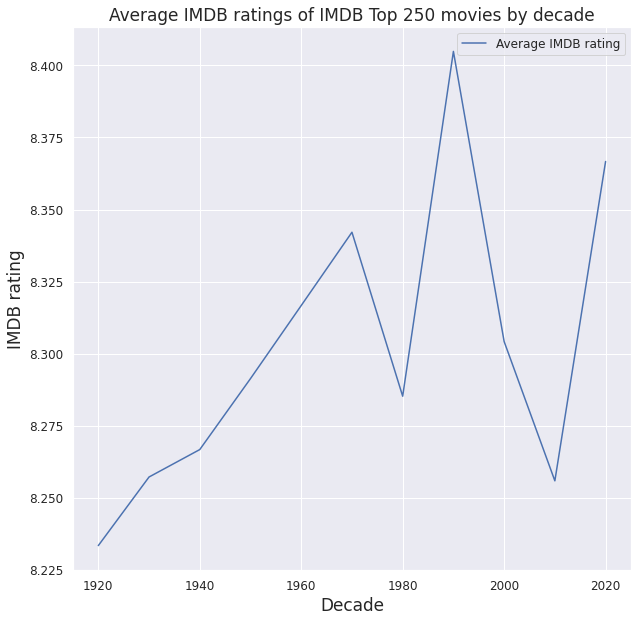

In [ ]:
# Plot average IMDB rating
moviesByDecade.plot(x = 'Decade', y = 'Average IMDB Rating', kind = 'line',figsize=(10, 10), fontsize = 12)
plt.title('Average IMDB ratings of IMDB Top 250 movies by decade', fontsize=17)
plt.legend(['Average IMDB rating'],fontsize = 12)
plt.xlabel('Decade', fontsize=17)
plt.ylabel('IMDB rating', fontsize=17)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

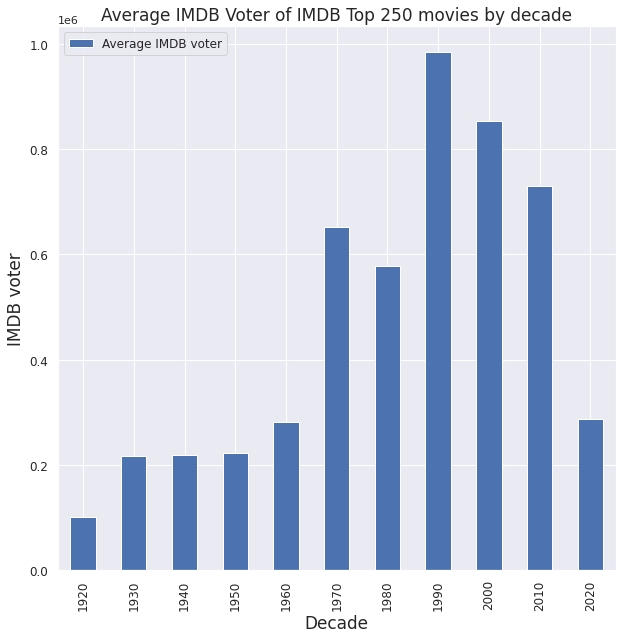

In [ ]:
# Plot average IMDB voter
moviesByDecade.plot(x = 'Decade', y = 'Average IMDB Voter', kind = 'bar',figsize=(10, 10), fontsize = 12)
plt.title('Average IMDB Voter of IMDB Top 250 movies by decade', fontsize=17)
plt.legend(['Average IMDB voter'], fontsize = 12)
plt.xlabel('Decade', fontsize=17)
plt.ylabel('IMDB voter', fontsize=17)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

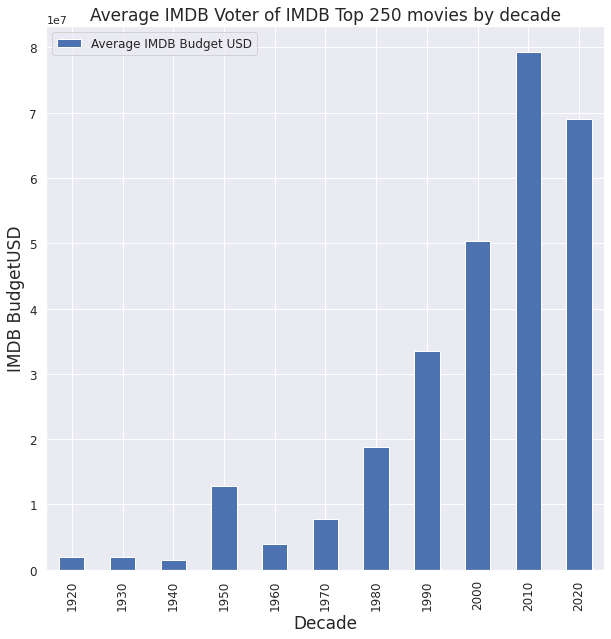

In [ ]:
# Plot average IMDB budget usd
moviesByDecade.plot(x = 'Decade', y = 'Average IMDB BudgetUSD', kind = 'bar',figsize=(10, 10), fontsize = 12)
plt.title('Average IMDB Voter of IMDB Top 250 movies by decade', fontsize=17)
plt.legend(['Average IMDB Budget USD'], fontsize = 12)
plt.xlabel('Decade', fontsize=17)
plt.ylabel('IMDB BudgetUSD', fontsize=17)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

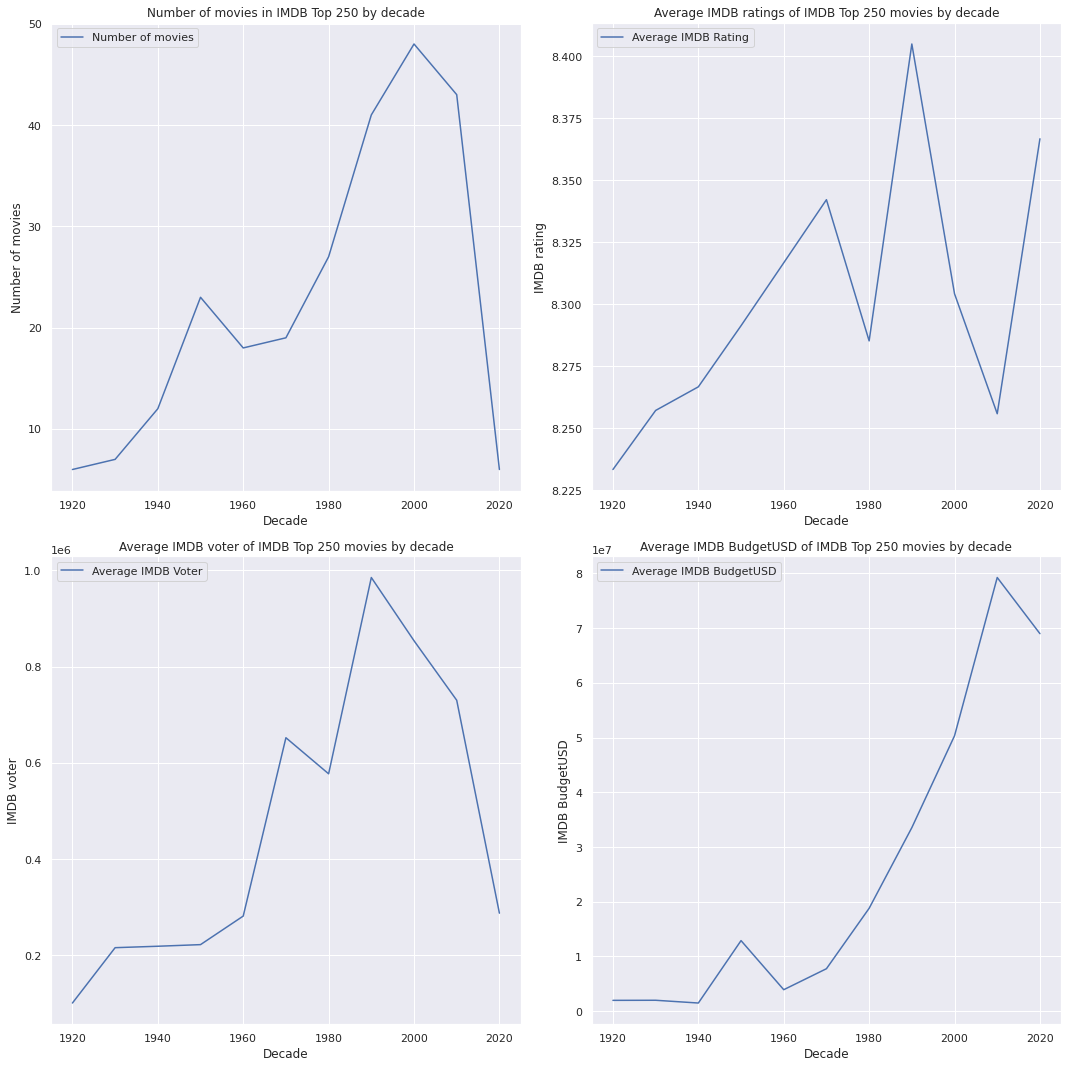

In [ ]:
#define subplot layout
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,15))

axes[0,0].plot(moviesByDecade['Decade'],moviesByDecade['Movies'])
axes[0,0].set_title('Number of movies in IMDB Top 250 by decade')
axes[0,0].legend(['Number of movies'],loc='best')
axes[0,0].set_xlabel('Decade')
axes[0,0].set_ylabel('Number of movies')

axes[0,1].plot(moviesByDecade['Decade'],moviesByDecade['Average IMDB Rating'])
axes[0,1].set_title('Average IMDB ratings of IMDB Top 250 movies by decade')
axes[0,1].legend(['Average IMDB Rating'])
axes[0,1].set_xlabel('Decade')
axes[0,1].set_ylabel('IMDB rating')

axes[1,0].plot(moviesByDecade['Decade'],moviesByDecade['Average IMDB Voter'])
axes[1,0].set_title('Average IMDB voter of IMDB Top 250 movies by decade')
axes[1,0].legend(['Average IMDB Voter'])
axes[1,0].set_xlabel('Decade')
axes[1,0].set_ylabel('IMDB voter')

axes[1,1].plot(moviesByDecade['Decade'],moviesByDecade['Average IMDB BudgetUSD'])
axes[1,1].set_title('Average IMDB BudgetUSD of IMDB Top 250 movies by decade')
axes[1,1].legend(['Average IMDB BudgetUSD'])
axes[1,1].set_xlabel('Decade')
axes[1,1].set_ylabel('IMDB BudgetUSD')

plt.tight_layout()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

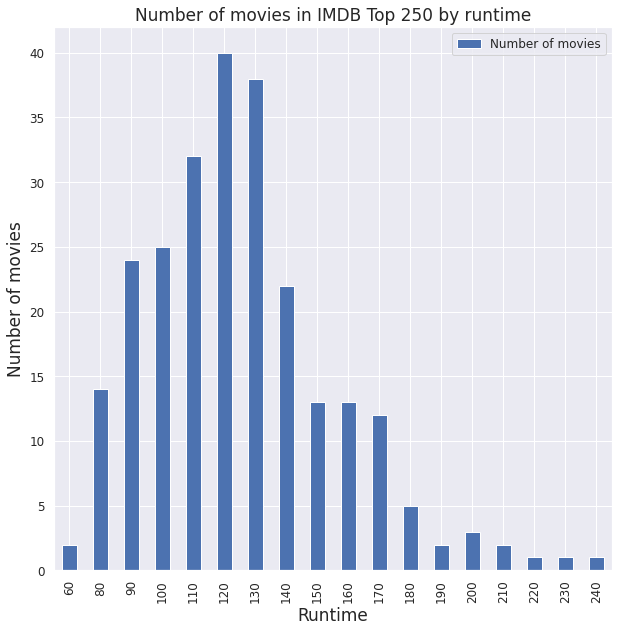

In [ ]:
# Plot movies by runtime
moviesByRuntime.plot(x = 'Runtime', y = 'Movies', kind = 'bar', figsize=(10, 10),fontsize = 12)
plt.title('Number of movies in IMDB Top 250 by runtime', fontsize=17)
plt.legend(['Number of movies'], fontsize = 12)
plt.xlabel('Runtime', fontsize=17)
plt.ylabel('Number of movies', fontsize=17)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

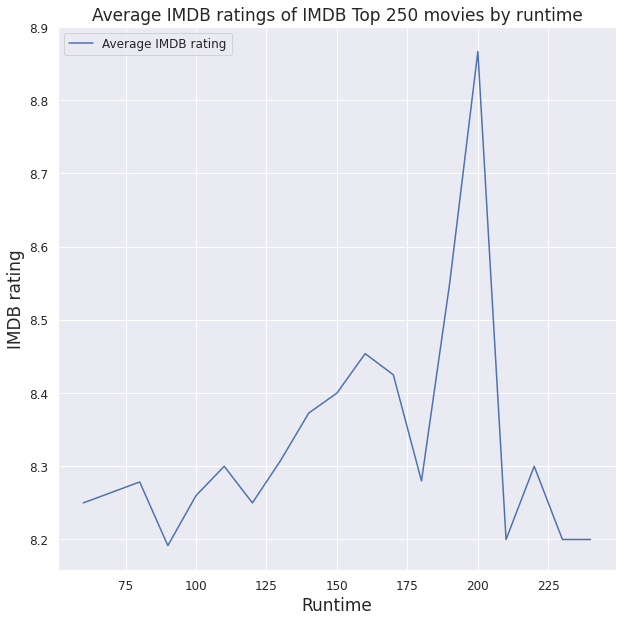

In [ ]:
# Plot average IMDB rating by Runtime
moviesByRuntime.plot(x = 'Runtime', y = 'Average IMDB Rating', kind = 'line',figsize=(10, 10), fontsize = 12)
plt.title('Average IMDB ratings of IMDB Top 250 movies by runtime', fontsize=17)
plt.legend(['Average IMDB rating'], fontsize = 12)
plt.xlabel('Runtime', fontsize=17)
plt.ylabel('IMDB rating', fontsize=17)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

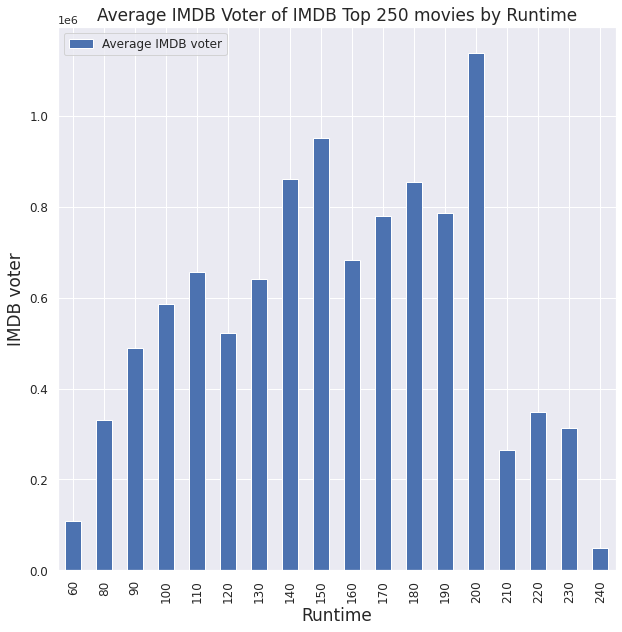

In [ ]:
# Plot average IMDB voter by Runtime
moviesByRuntime.plot(x = 'Runtime', y = 'Average IMDB Voter', kind = 'bar',figsize=(10, 10), fontsize = 12)
plt.title('Average IMDB Voter of IMDB Top 250 movies by Runtime', fontsize=17)
plt.legend(['Average IMDB voter'], fontsize = 12)
plt.xlabel('Runtime', fontsize=17)
plt.ylabel('IMDB voter', fontsize=17)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

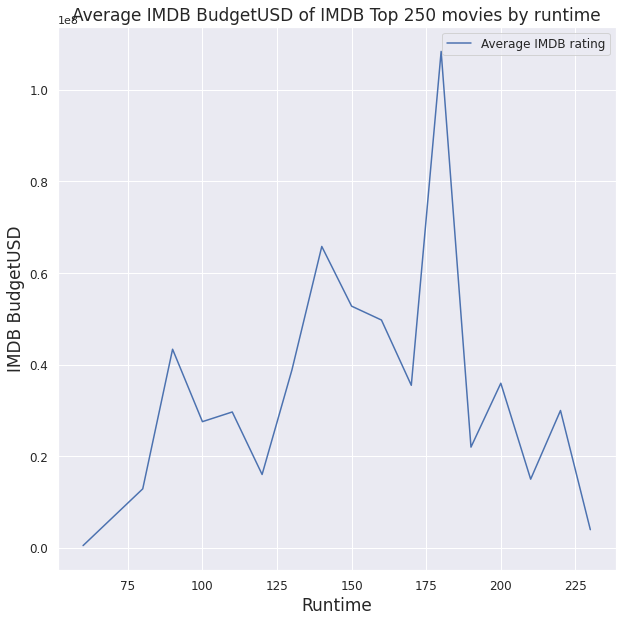

In [ ]:
# Plot average IMDB BudgetUSD by Runtime
moviesByRuntime.plot(x = 'Runtime', y = 'Average IMDB BudgetUSD', kind = 'line',figsize=(10, 10), fontsize = 12)
plt.title('Average IMDB BudgetUSD of IMDB Top 250 movies by runtime', fontsize=17)
plt.legend(['Average IMDB rating'], fontsize = 12)
plt.xlabel('Runtime', fontsize=17)
plt.ylabel('IMDB BudgetUSD', fontsize=17)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

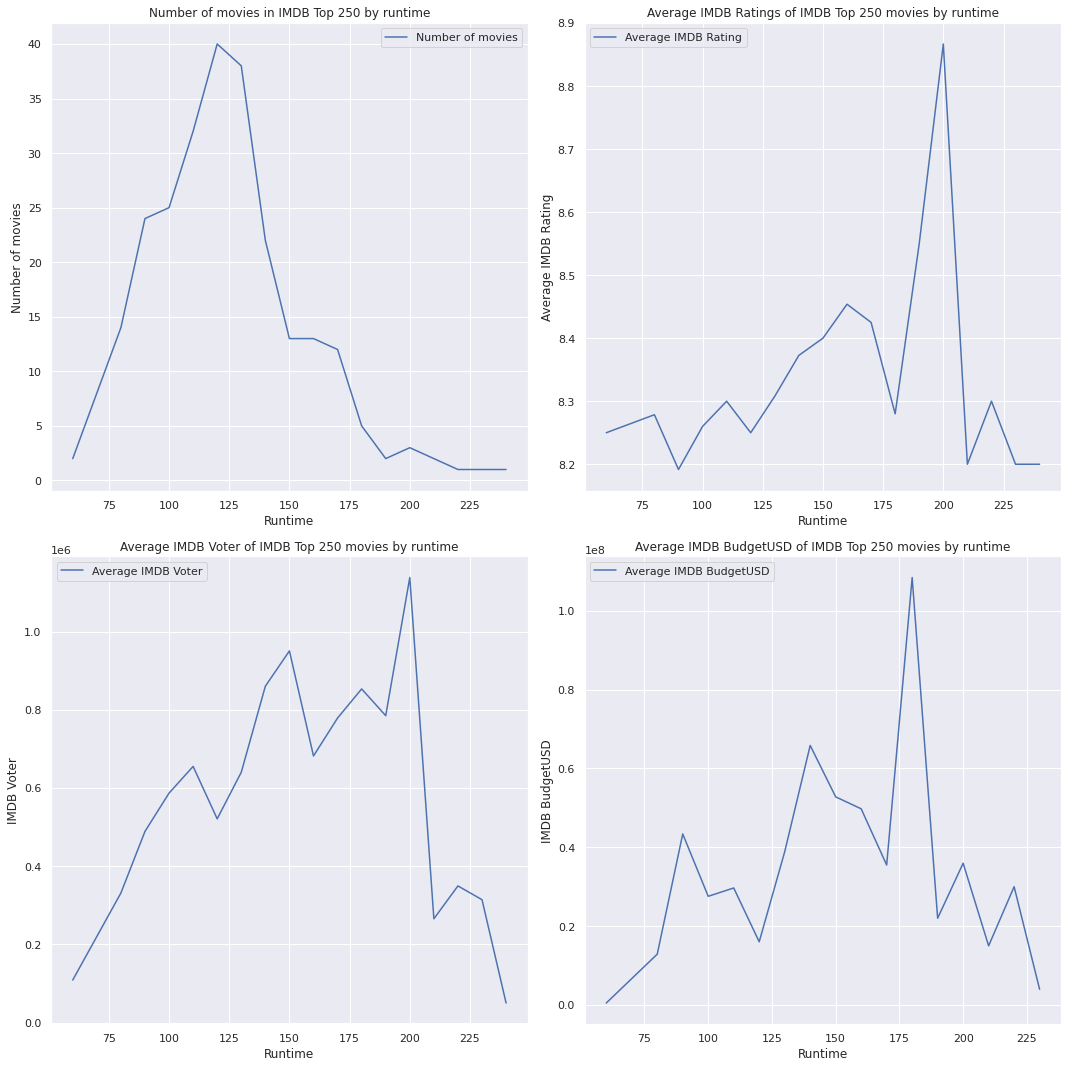

In [ ]:
#define subplot layout
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,15))

axes[0,0].plot(moviesByRuntime['Runtime'],moviesByRuntime['Movies'])
axes[0,0].set_title('Number of movies in IMDB Top 250 by runtime')
axes[0,0].legend(['Number of movies'],loc='best')
axes[0,0].set_xlabel('Runtime')
axes[0,0].set_ylabel('Number of movies')

axes[0,1].plot(moviesByRuntime['Runtime'],moviesByRuntime['Average IMDB Rating'])
axes[0,1].set_title('Average IMDB Ratings of IMDB Top 250 movies by runtime')
axes[0,1].legend(['Average IMDB Rating'],loc='best')
axes[0,1].set_xlabel('Runtime')
axes[0,1].set_ylabel('Average IMDB Rating')

axes[1,0].plot(moviesByRuntime['Runtime'],moviesByRuntime['Average IMDB Voter'])
axes[1,0].set_title('Average IMDB Voter of IMDB Top 250 movies by runtime')
axes[1,0].legend(['Average IMDB Voter'])
axes[1,0].set_xlabel('Runtime')
axes[1,0].set_ylabel('IMDB Voter')

axes[1,1].plot(moviesByRuntime['Runtime'],moviesByRuntime['Average IMDB BudgetUSD'])
axes[1,1].set_title('Average IMDB BudgetUSD of IMDB Top 250 movies by runtime')
axes[1,1].legend(['Average IMDB BudgetUSD'])
axes[1,1].set_xlabel('Runtime')
axes[1,1].set_ylabel('IMDB BudgetUSD')

plt.tight_layout()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

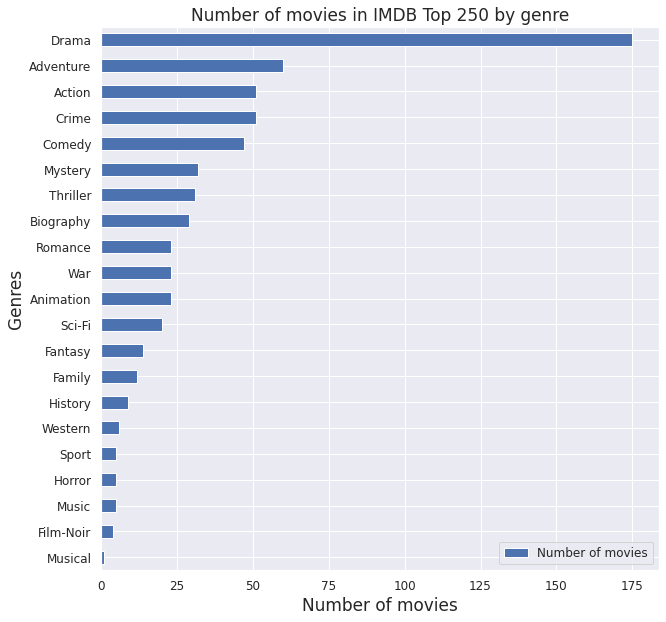

In [ ]:
# Plot movies by genre
moviesByGenre.plot(x = 'Genres', y = 'Movies', kind = 'barh', figsize=(10, 10),fontsize = 12)
plt.title('Number of movies in IMDB Top 250 by genre', fontsize=17)
plt.legend(['Number of movies'],loc='lower right', fontsize = 12)
plt.xlabel('Number of movies', fontsize=17)
plt.ylabel('Genres', fontsize=17)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

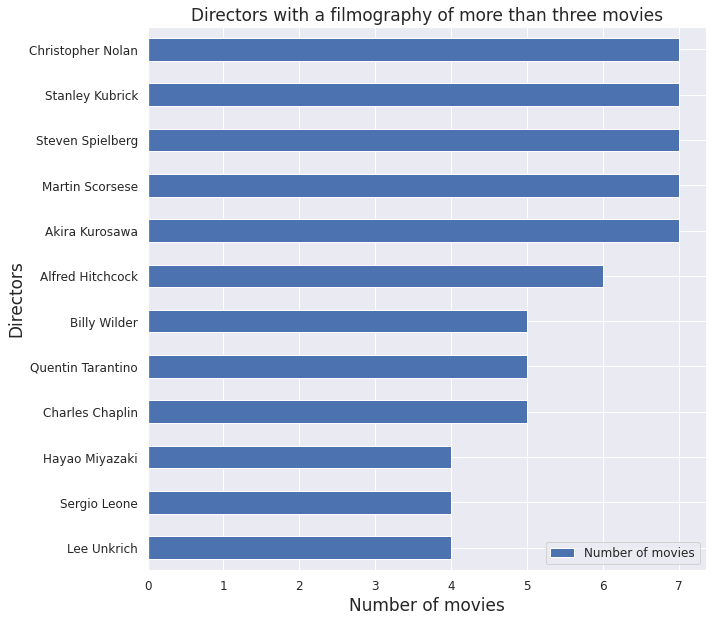

In [ ]:
# Plot movies by director
mdTop.plot(x = 'Directors', y = 'Movies', kind = 'barh', figsize=(10, 10),fontsize = 12)
plt.title('Directors with a filmography of more than three movies', fontsize=17)
plt.legend(['Number of movies'], fontsize = 12)
plt.xlabel('Number of movies', fontsize=17)
plt.ylabel('Directors', fontsize=17)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

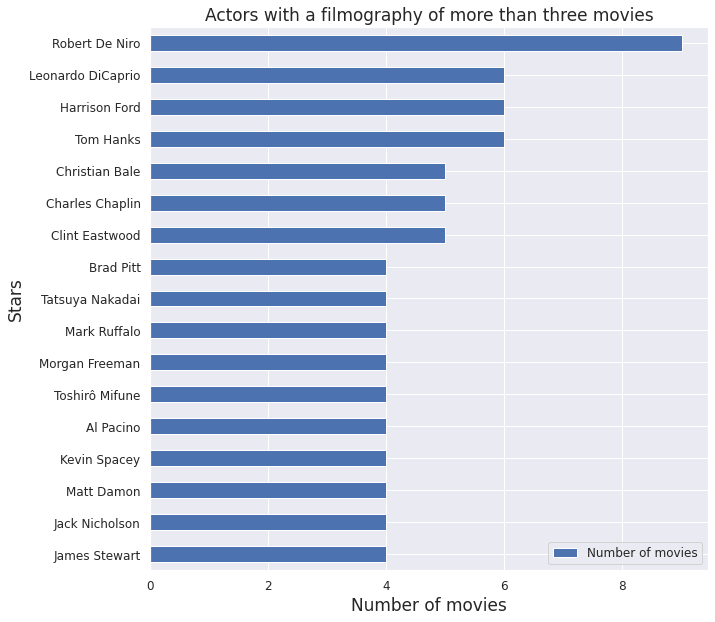

In [ ]:
# Plot movies by star
msTop.plot(x = 'Stars', y = 'Movies', kind = 'barh', figsize=(10, 10),fontsize = 12)
plt.title('Actors with a filmography of more than three movies', fontsize=17)
plt.legend(['Number of movies'], fontsize = 12)
plt.xlabel('Number of movies', fontsize=17)
plt.ylabel('Stars', fontsize=17)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

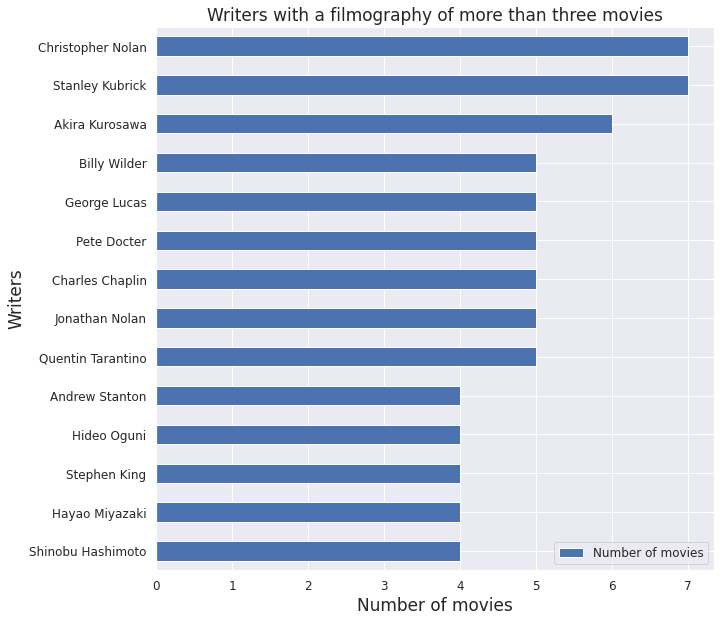

In [ ]:
# Plot movies by writer
mwTop.plot(x = 'Writers', y = 'Movies', kind = 'barh', figsize=(10, 10),fontsize = 12)
plt.title('Writers with a filmography of more than three movies', fontsize=17)
plt.legend(['Number of movies'], fontsize = 12)
plt.xlabel('Number of movies', fontsize=17)
plt.ylabel('Writers', fontsize=17)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

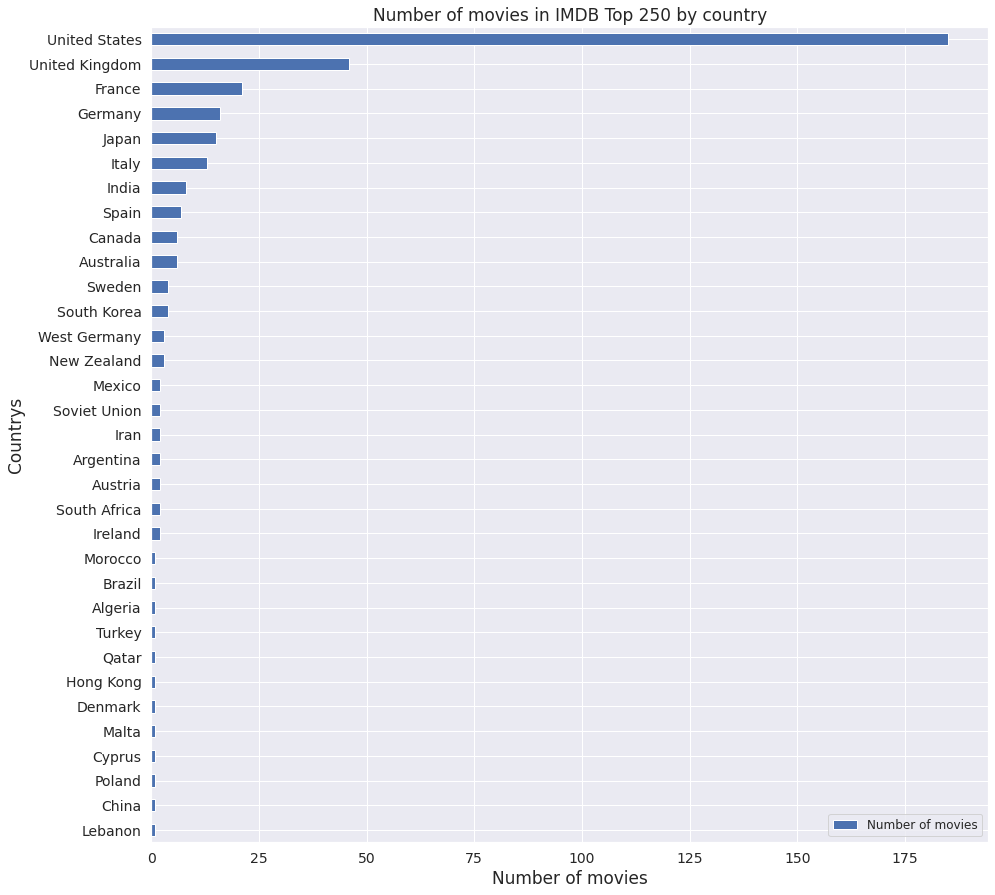

In [ ]:
# Plot movies by country
moviesByCountry.plot(x = 'Countrys', y = 'Movies', kind = 'barh', figsize=(15, 15),fontsize = 14)
plt.title('Number of movies in IMDB Top 250 by country', fontsize=17)
plt.legend(['Number of movies'],loc='lower right',fontsize = 12)
plt.xlabel('Number of movies', fontsize=17)
plt.ylabel('Countrys', fontsize=17)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

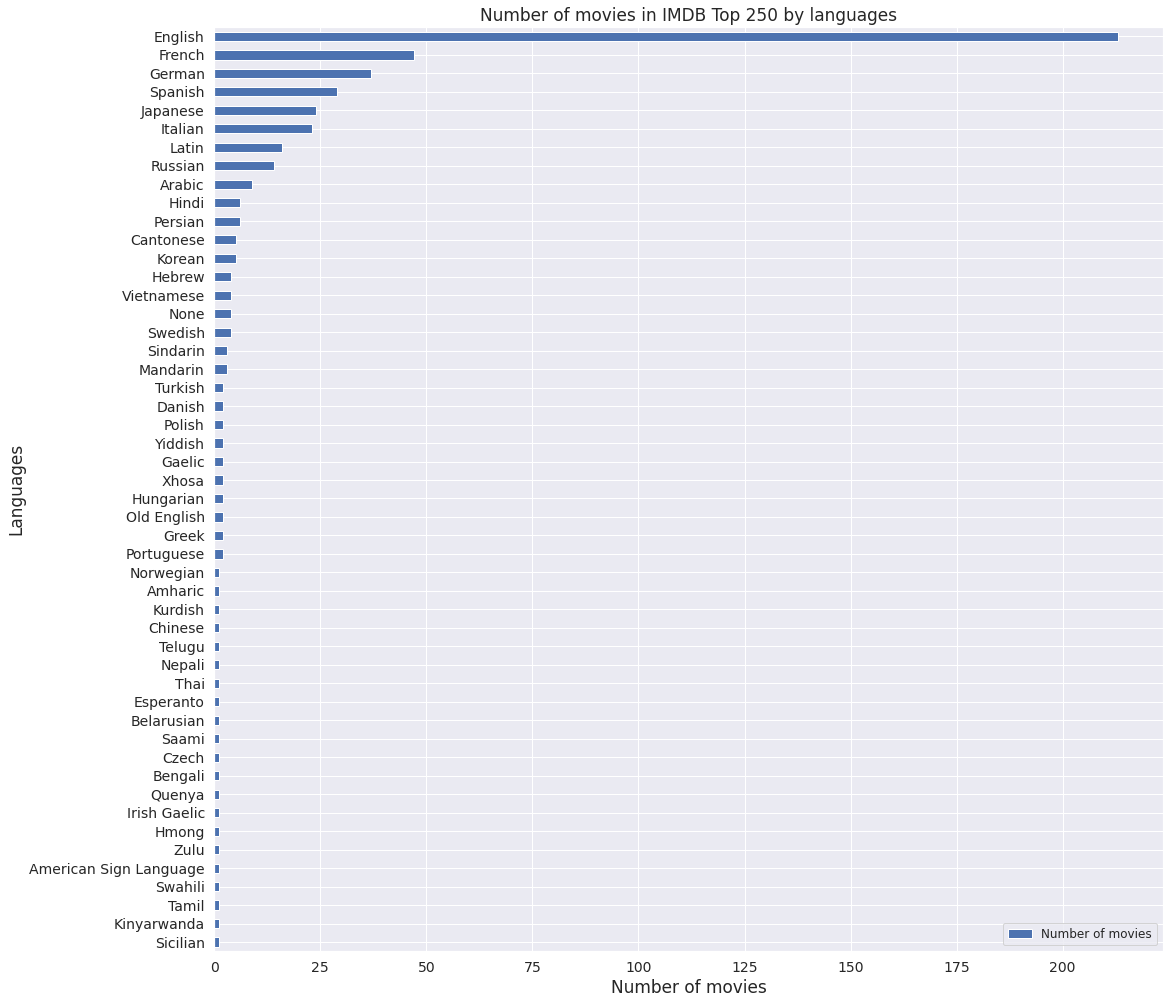

In [ ]:
# Plot movies by language
moviesByLanguage.plot(x = 'Languages', y = 'Movies', kind = 'barh', figsize=(17, 17),fontsize = 14)
plt.title('Number of movies in IMDB Top 250 by languages', fontsize=17)
plt.legend(['Number of movies'],loc='lower right', fontsize = 12)
plt.xlabel('Number of movies', fontsize=17)
plt.ylabel('Languages', fontsize=17)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

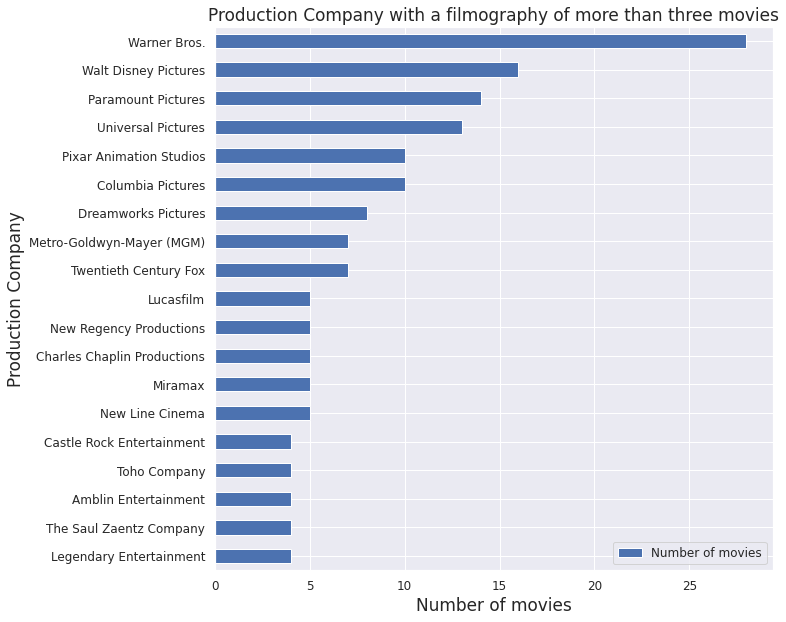

In [ ]:
# Plot movies by production company
mpcTop.plot(x = 'ProductionCompany', y = 'Movies', kind = 'barh', figsize=(10, 10),fontsize = 12)
plt.title('Production Company with a filmography of more than three movies', fontsize=17)
plt.legend(['Number of movies'], fontsize = 12)
plt.xlabel('Number of movies', fontsize=17)
plt.ylabel('Production Company', fontsize=17)
plt.show()